# Feature Engineering Mexico Presidential Elections 

## Introduction
Feature Engineering is a critical step in the data science workflow. It involves creating, transforming, and selecting features that better represent the underlying patterns in the data, thereby enhancing model performance and predictive accuracy. Effective feature engineering can simplify complex data, improve interpretability, and address issues like missing data or imbalanced classes.



## Objectives
* Enhance Model Performance: Create and transform features to improve the predictive power of the model.
* Improve Interpretability: Develop features that make the model’s decisions more understandable.
* Handle Data Issues: Address missing values and imbalanced data through feature engineering techniques.
* Incorporate Domain Knowledge: Use domain-specific insights to create meaningful features that capture relevant information.


In [1]:
#Import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [2]:
#load dataset
df= pd.read_csv('EDA_output.csv')


In [3]:
df.head()

,COMPETITOR_Votes_2024,Urban_Polling_Stations,Non_Urban_Polling_Stations,AMLO_2018,GDP_2024,Federal_Social_Welfare_Budget,Sheinbaum_MORENA_Events,Average_Schooling_Years,Avg_Income_Yr,Extreme_Poberty_habitants,Poberty_Habitants,Public_Hospital_Users,Total_Vehicles,Catholic_Believers,Murders_Yr,Median_Age,Adults,Total_Population
0,270389,1279,563,190820,316500,495079,3,10,313152,26,326,1153954,721372,1159832,88,27,761561,1425607
1,862661,4671,703,675810,929459,604660,5,10,355648,50,461,2783913,2208801,2187369,2925,30,2187557,3769020
2,175755,827,287,136806,177421,472056,2,10,365668,6,106,666840,587090,544008,90,29,456475,798447
3,240693,734,496,171328,473101,536081,5,10,229832,92,337,721266,372668,515526,110,29,504195,928363
4,1519559,2519,4354,1106665,368789,826240,8,8,159380,1608,2231,3677747,6368520,2704411,503,24,5405537,9209944


In [4]:
# Rename Sheinbaum_MORENA_Events to MORENA_Events
df.rename(columns={'Sheinbaum_MORENA_Events':'MORENA_Events'}, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   COMPETITOR_Votes_2024          32 non-null     int64
 1   Urban_Polling_Stations         32 non-null     int64
 2   Non_Urban_Polling_Stations     32 non-null     int64
 3   AMLO_2018                      32 non-null     int64
 4   GDP_2024                       32 non-null     int64
 5   Federal_Social_Welfare_Budget  32 non-null     int64
 6   MORENA_Events                  32 non-null     int64
 7   Average_Schooling_Years        32 non-null     int64
 8   Avg_Income_Yr                  32 non-null     int64
 9   Extreme_Poberty_habitants      32 non-null     int64
 10  Poberty_Habitants              32 non-null     int64
 11  Public_Hospital_Users          32 non-null     int64
 12  Total_Vehicles                 32 non-null     int64
 13  Catholic_Believers    

# Categorical Variables 
  During EDA I detected that 2 features have a behavior of categorical variables (despite they are numerical):
  * Average_schooling days
  * Median Age

I initially droped them from my dataframe during EDA.
However, as far I recently learned those 2 features can also be well understood by ML algoritm if I can encode them with Hot Encoding (Get dummies) and perhaps could interact with other variables or explain some behavior in my dependant variable, so I will re-consider them in this Feature Engineering Pipe Lines.

#So I cancelled this code in my EDA and exporeted again the DF
#numeric_df.drop(columns=['Median_Age', 'Average_Schooling_Years'], inplace=True)


Let’s start by analyzing the distribution of these variables and then proceed with the binning and encoding.

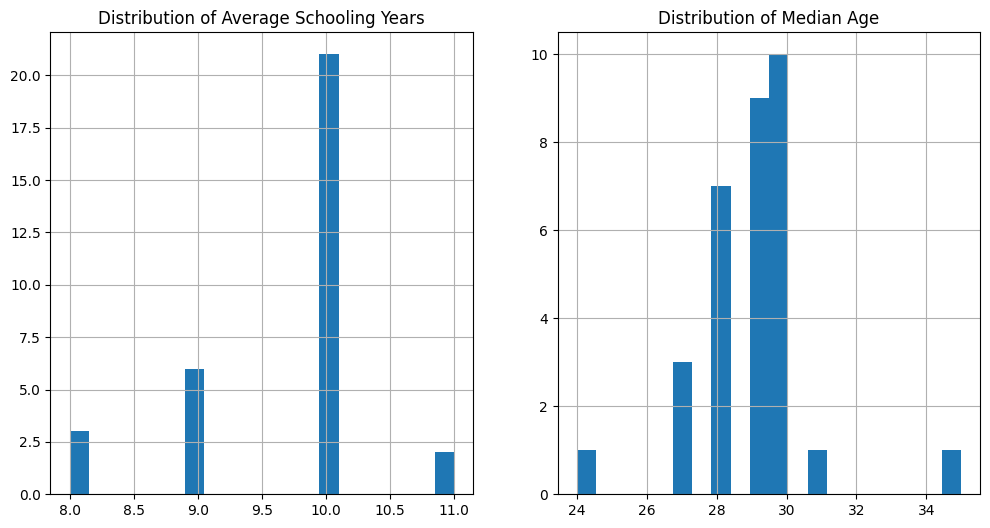

In [6]:
# Plot the distribution of Average_Schooling_Years
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['Average_Schooling_Years'].hist(bins=20)
plt.title('Distribution of Average Schooling Years')

plt.subplot(1, 2, 2)
df['Median_Age'].hist(bins=20)
plt.title('Distribution of Median Age')

plt.show()

Based on the distributions I define bins for each variabl

In [7]:
# Adjust bins for Average_Schooling_Years
df['Schooling_Bins'] = pd.cut(df['Average_Schooling_Years'],
                              bins=[0, 8.0, 9.0, 10.0, 11.0, float('inf')],
                              labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], include_lowest=True)

# Adjust bins for Median_Age
df['Age_Bins'] = pd.cut(df['Median_Age'],
                        bins=[0, 24, 27, 29, 31, 33, float('inf')],
                        labels=['Very Young', 'Young Adult', 'Adult', 'Middle Age', 'Senior', 'Elder'], include_lowest=True)

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Schooling_Bins', 'Age_Bins'], drop_first=True)

# Display the first few rows of the updated dataframe
df_encoded.head(10)


,COMPETITOR_Votes_2024,Urban_Polling_Stations,Non_Urban_Polling_Stations,AMLO_2018,GDP_2024,Federal_Social_Welfare_Budget,MORENA_Events,Average_Schooling_Years,Avg_Income_Yr,Extreme_Poberty_habitants,...,Total_Population,Schooling_Bins_Low,Schooling_Bins_Medium,Schooling_Bins_High,Schooling_Bins_Very High,Age_Bins_Young Adult,Age_Bins_Adult,Age_Bins_Middle Age,Age_Bins_Senior,Age_Bins_Elder
0,270389,1279,563,190820,316500,495079,3,10,313152,26,...,1425607,False,True,False,False,True,False,False,False,False
1,862661,4671,703,675810,929459,604660,5,10,355648,50,...,3769020,False,True,False,False,False,False,True,False,False
2,175755,827,287,136806,177421,472056,2,10,365668,6,...,798447,False,True,False,False,False,True,False,False,False
3,240693,734,496,171328,473101,536081,5,10,229832,92,...,928363,False,True,False,False,False,True,False,False,False
4,1519559,2519,4354,1106665,368789,826240,8,8,159380,1608,...,9209944,False,False,False,False,False,False,False,False,False
5,744823,4601,1160,441965,919617,386882,6,10,327716,80,...,3146771,False,True,False,False,False,True,False,False,False
6,2978243,13166,265,2670615,3640388,2551158,398,11,357240,159,...,731391,False,False,True,False,False,False,False,False,True
7,813432,3307,836,515518,922287,1235326,7,10,300504,59,...,5543828,False,True,False,False,False,True,False,False,False
8,182063,667,362,178123,148130,9277541,2,10,277284,9,...,3741869,False,True,False,False,False,False,True,False,False
9,402566,1530,1088,247076,296963,1509159,4,10,228880,118,...,1832650,False,True,False,False,True,False,False,False,False


## Feature Engineering to Numerical Variables


### Ratios

Some Features in my dataframe might seem to have very high levels or values de pending on the population of citizens living in each Entity.
In order to reduce this "false impresion" of greatness, I will estimate ratios to the most popular features that are dependant to Population Siz:

Lets first create new features that calculate ratios at:
* Urban Polling Stations / Non Urban
* Extreme Poberty / Total Population
* Public Hospital Users / Total Population 
* Average Income per Year / Poverty Rate
* Total Vehicles / Total Population


In [8]:
# Create new features with Ratios
df_encoded['Urbanization_Ratio'] = df_encoded['Urban_Polling_Stations'] / (df_encoded['Non_Urban_Polling_Stations'] + 1)
df_encoded['Poverty_Rate'] = df_encoded['Extreme_Poberty_habitants'] / df_encoded['Total_Population']
df_encoded['Healthcare_Demand'] = df_encoded['Public_Hospital_Users'] / df_encoded['Total_Population']
df_encoded['Income_vs_Poverty'] = df_encoded['Avg_Income_Yr'] * df_encoded['Poverty_Rate']
df_encoded['Vehicles_per_Capita'] = df_encoded['Total_Vehicles'] / df_encoded['Total_Population']

In [9]:
# Other proportions vs Total Population
df_encoded['GDP_per_Capita'] = df_encoded['GDP_2024'] / df_encoded['Total_Population']
df_encoded['Income_per_Capita'] = df_encoded['Avg_Income_Yr'] / df_encoded['Total_Population']
df_encoded['Vehicles_per_Capita'] = df_encoded['Total_Vehicles'] / df_encoded['Total_Population']

In [10]:
df_encoded.head(10)

,COMPETITOR_Votes_2024,Urban_Polling_Stations,Non_Urban_Polling_Stations,AMLO_2018,GDP_2024,Federal_Social_Welfare_Budget,MORENA_Events,Average_Schooling_Years,Avg_Income_Yr,Extreme_Poberty_habitants,...,Age_Bins_Middle Age,Age_Bins_Senior,Age_Bins_Elder,Urbanization_Ratio,Poverty_Rate,Healthcare_Demand,Income_vs_Poverty,Vehicles_per_Capita,GDP_per_Capita,Income_per_Capita
0,270389,1279,563,190820,316500,495079,3,10,313152,26,...,False,False,False,2.267730,0.000018,0.809447,5.711218,0.506010,0.222011,0.219662
1,862661,4671,703,675810,929459,604660,5,10,355648,50,...,True,False,False,6.634943,0.000013,0.738630,4.718043,0.586041,0.246605,0.094361
2,175755,827,287,136806,177421,472056,2,10,365668,6,...,False,False,False,2.871528,0.000008,0.835171,2.747844,0.735290,0.222208,0.457974
3,240693,734,496,171328,473101,536081,5,10,229832,92,...,False,False,False,1.476861,0.000099,0.776922,22.776160,0.401425,0.509608,0.247567
4,1519559,2519,4354,1106665,368789,826240,8,8,159380,1608,...,False,False,False,0.578416,0.000175,0.399323,27.826775,0.691483,0.040042,0.017305
5,744823,4601,1160,441965,919617,386882,6,10,327716,80,...,False,False,False,3.962963,0.000025,0.945524,8.331486,0.358393,0.292241,0.104144
6,2978243,13166,265,2670615,3640388,2551158,398,11,357240,159,...,False,False,True,49.496241,0.000217,8.684874,77.661825,0.543221,4.977349,0.488439
7,813432,3307,836,515518,922287,1235326,7,10,300504,59,...,False,False,False,3.951016,0.000011,0.448716,3.198104,0.204943,0.166363,0.054205
8,182063,667,362,178123,148130,9277541,2,10,277284,9,...,True,False,False,1.837466,0.000002,0.161981,0.666928,0.516271,0.039587,0.074103
9,402566,1530,1088,247076,296963,1509159,4,10,228880,118,...,False,False,False,1.404959,0.000064,0.745817,14.737042,0.379181,0.162040,0.124890


### Transformations

In [11]:
# Apply log transformations to the new proportion features
df_encoded['Log_GDP_per_Capita'] = np.log(df_encoded['GDP_per_Capita'] + 1)
df_encoded['Log_Income_per_Capita'] = np.log(df_encoded['Income_per_Capita'] + 1)
df_encoded['Log_Vehicles_per_Capita'] = np.log(df_encoded['Vehicles_per_Capita'] + 1)

In [12]:
# Drop the original proportion features
df_encoded.drop(['GDP_per_Capita', 'Income_per_Capita', 'Vehicles_per_Capita'], axis=1, inplace=True)

In [13]:
df_encoded.columns

Index(['COMPETITOR_Votes_2024', 'Urban_Polling_Stations',
       'Non_Urban_Polling_Stations', 'AMLO_2018', 'GDP_2024',
       'Federal_Social_Welfare_Budget', 'MORENA_Events',
       'Average_Schooling_Years', 'Avg_Income_Yr', 'Extreme_Poberty_habitants',
       'Poberty_Habitants', 'Public_Hospital_Users', 'Total_Vehicles',
       'Catholic_Believers', 'Murders_Yr', 'Median_Age', 'Adults',
       'Total_Population', 'Schooling_Bins_Low', 'Schooling_Bins_Medium',
       'Schooling_Bins_High', 'Schooling_Bins_Very High',
       'Age_Bins_Young Adult', 'Age_Bins_Adult', 'Age_Bins_Middle Age',
       'Age_Bins_Senior', 'Age_Bins_Elder', 'Urbanization_Ratio',
       'Poverty_Rate', 'Healthcare_Demand', 'Income_vs_Poverty',
       'Log_GDP_per_Capita', 'Log_Income_per_Capita',
       'Log_Vehicles_per_Capita'],
      dtype='object')

### Scaling or Standarization Process

With this code I will plot Histograms and boxplots of all my numeric features (Excluding the Categorical Boolean Features)

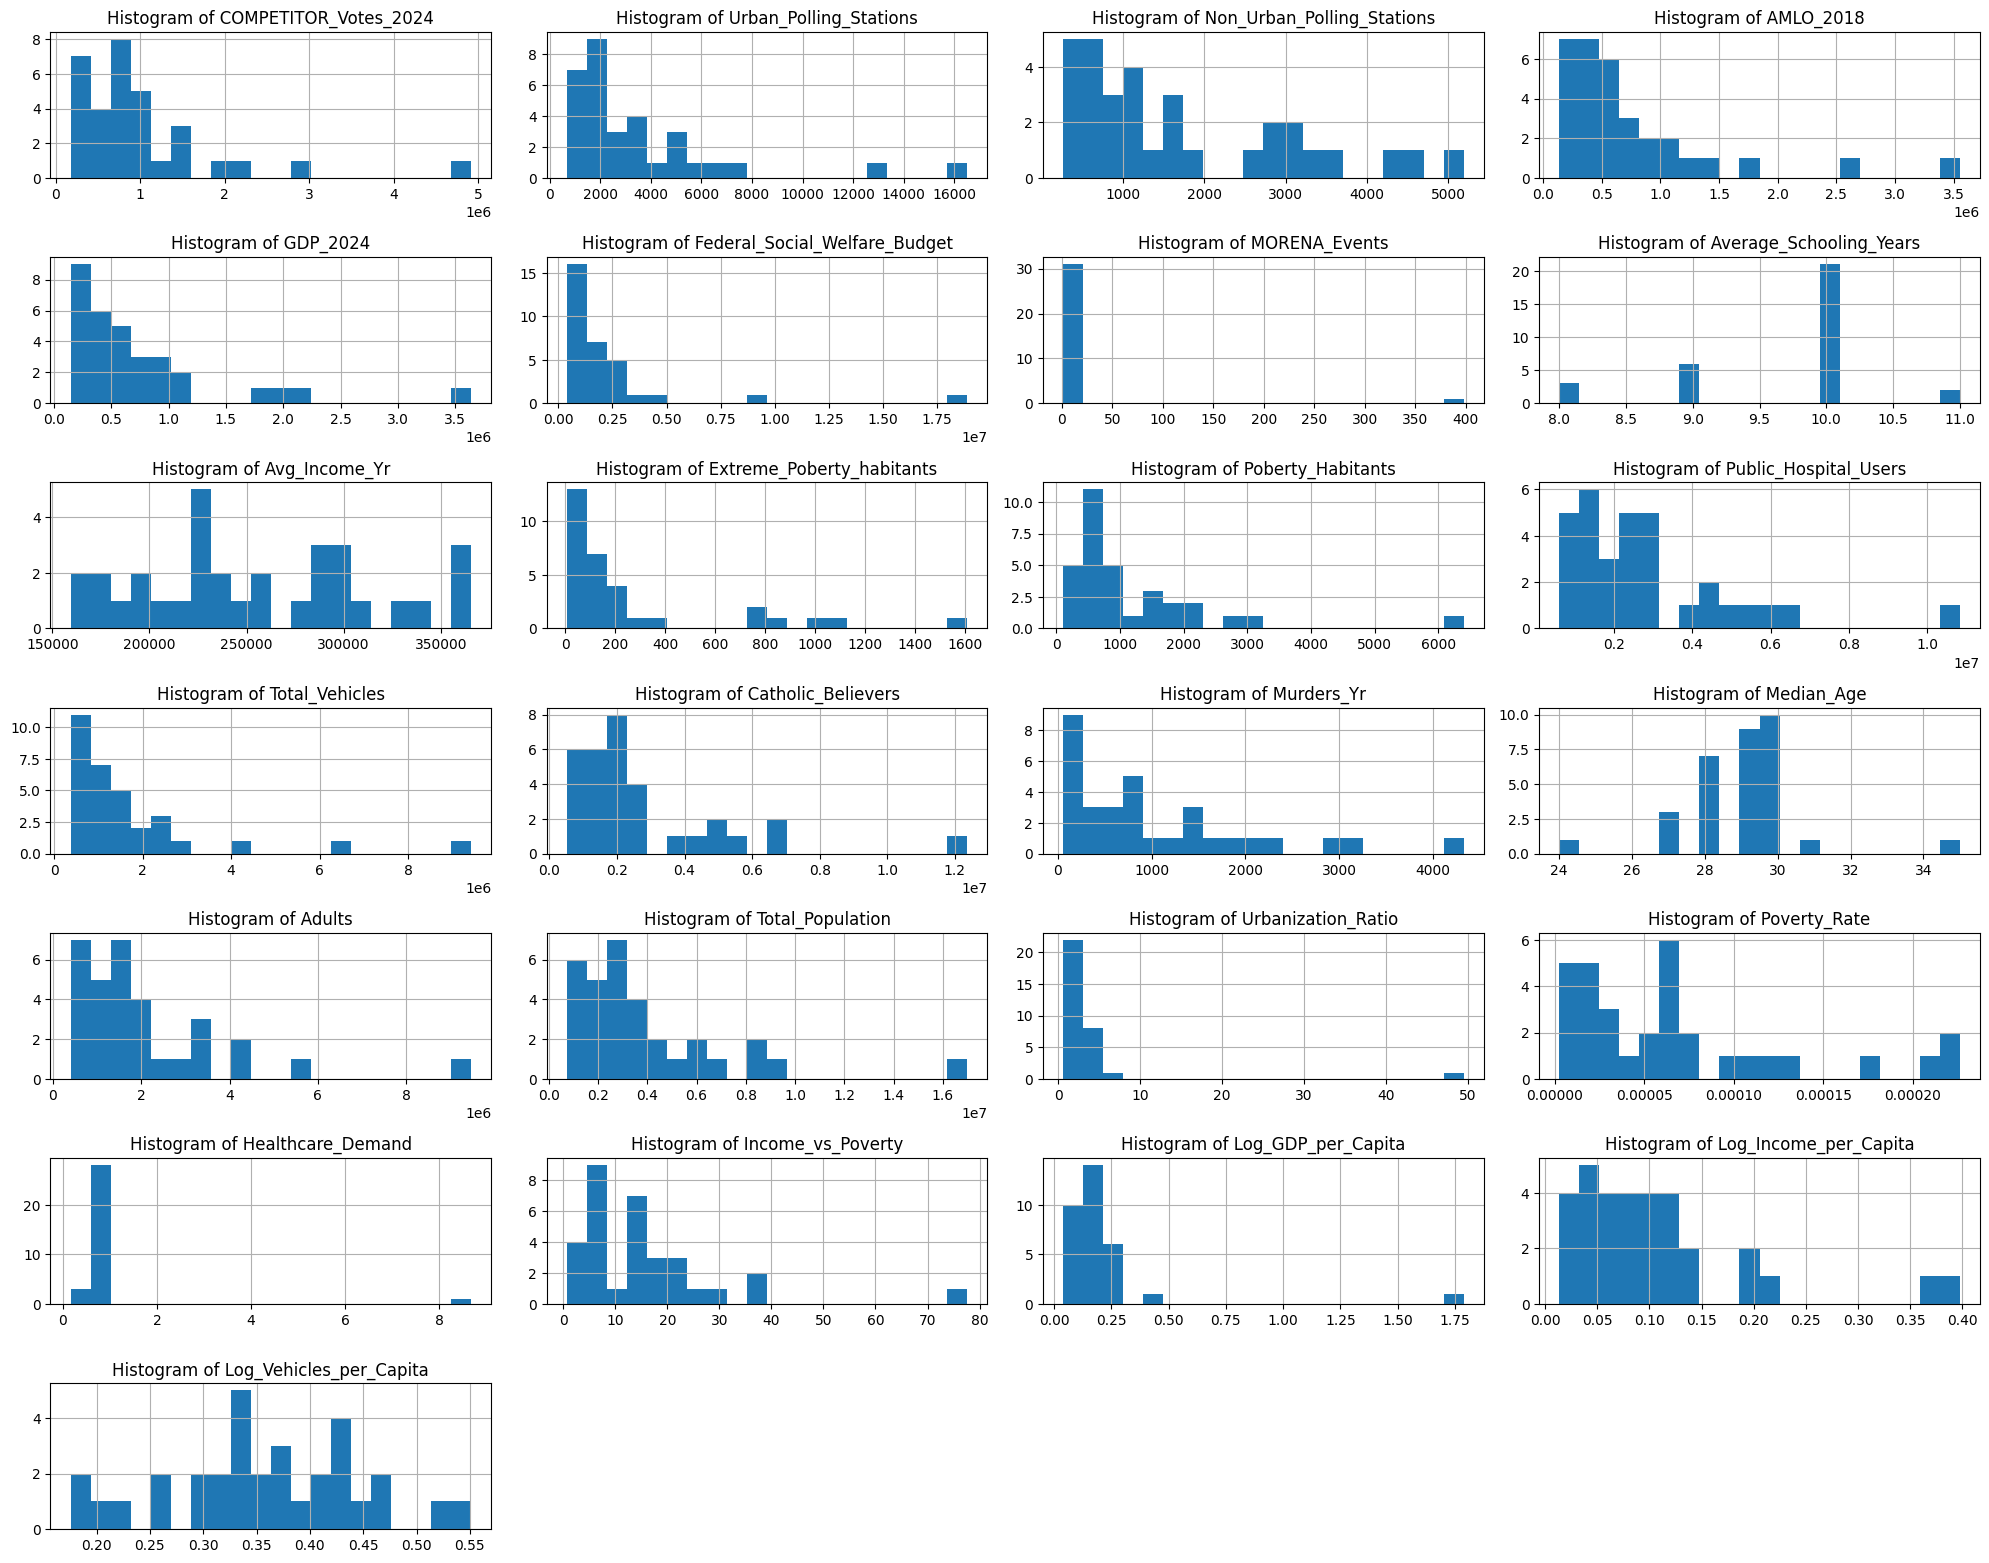

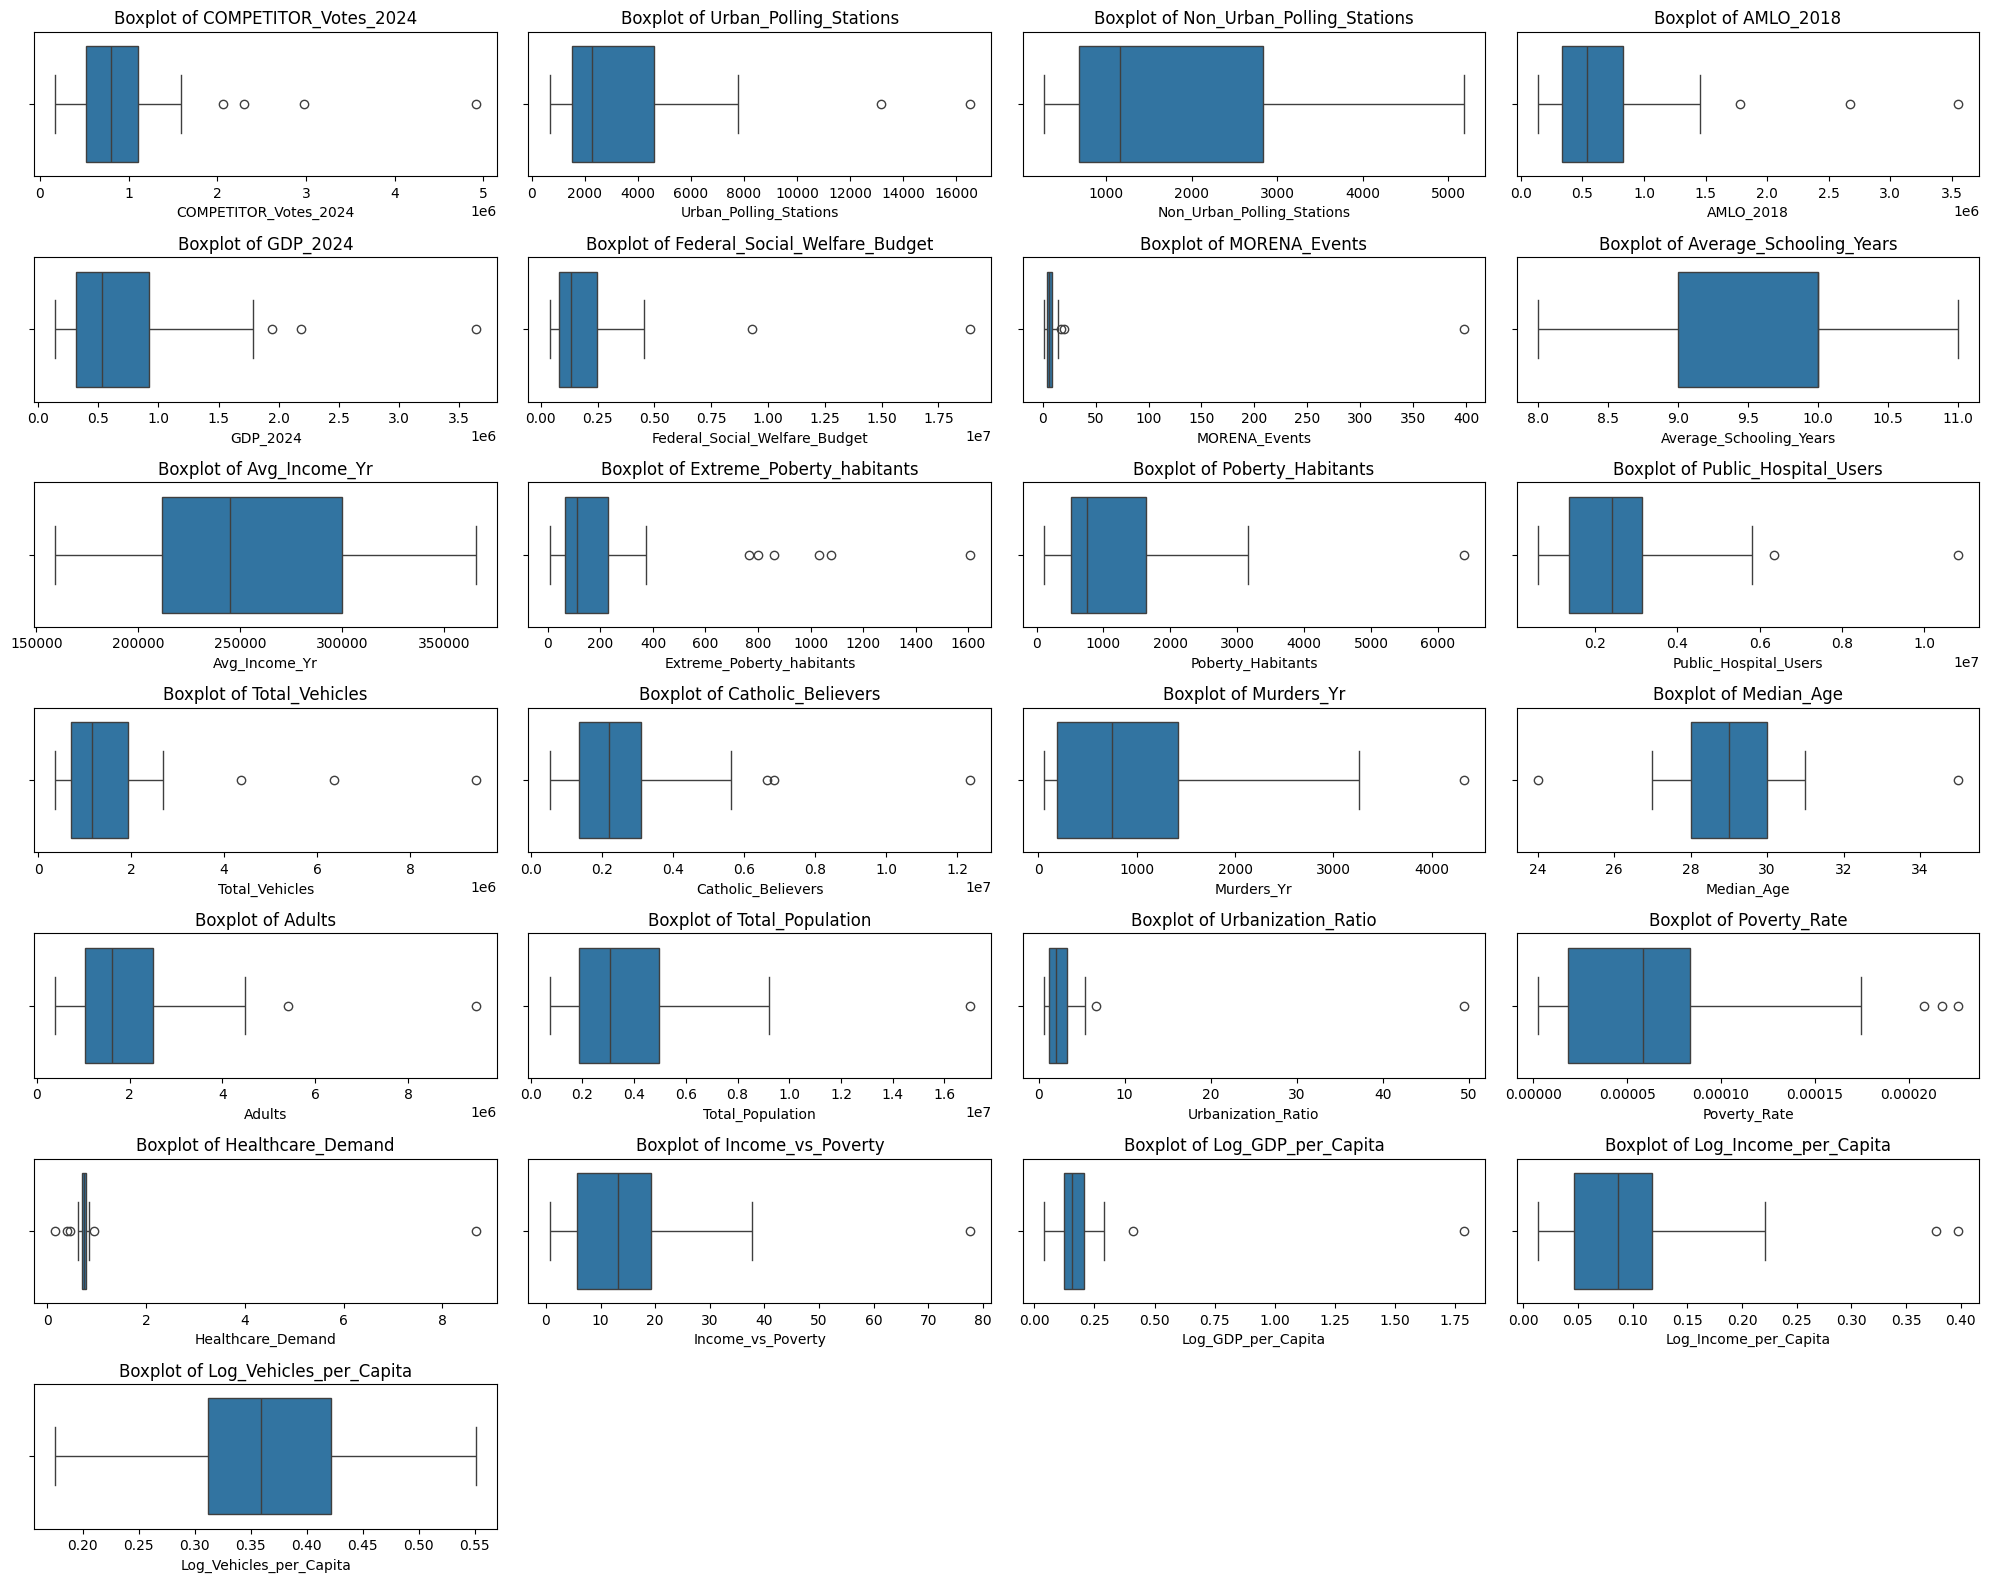

In [14]:
# Select only numeric columns
numeric_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Create histograms for numeric features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(9, 4, i)
    df_encoded[feature].hist(bins=20)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Create boxplots for numeric features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(9, 4, i)
    sns.boxplot(x=df_encoded[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

My Data Is very Skewed, lets Standarize!

In [15]:
# Select only numeric columns for scaling
features_to_scale = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(df_encoded[features_to_scale])

# Create a dataframe with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Drop the original features and concatenate the scaled ones
df_encoded.drop(features_to_scale, axis=1, inplace=True)
df_encoded = pd.concat([df_encoded, scaled_df], axis=1)

# Display the first few rows of the updated dataframe
df_encoded.head()

,Schooling_Bins_Low,Schooling_Bins_Medium,Schooling_Bins_High,Schooling_Bins_Very High,Age_Bins_Young Adult,Age_Bins_Adult,Age_Bins_Middle Age,Age_Bins_Senior,Age_Bins_Elder,COMPETITOR_Votes_2024,...,Median_Age,Adults,Total_Population,Urbanization_Ratio,Poverty_Rate,Healthcare_Demand,Income_vs_Poverty,Log_GDP_per_Capita,Log_Income_per_Capita,Log_Vehicles_per_Capita
0,False,True,False,False,True,False,False,False,False,-0.826256,...,-1.16692,-0.760959,-0.778683,-0.179094,-0.818624,-0.107315,-0.684212,-0.054838,1.050425,0.573788
1,False,True,False,False,False,False,True,False,False,-0.191047,...,0.58346,0.034264,-0.052355,0.344803,-0.898666,-0.158091,-0.752846,0.013539,-0.172075,1.148203
2,False,True,False,False,False,True,False,False,False,-0.927750,...,0.00000,-0.931093,-0.973068,-0.106661,-0.991260,-0.088872,-0.888999,-0.054285,3.063130,2.145926
3,False,True,False,False,False,True,False,False,False,-0.858104,...,0.00000,-0.904481,-0.932801,-0.273967,0.483175,-0.130636,0.495079,0.670421,1.305532,-0.224699
4,False,False,False,False,False,False,False,False,False,0.513474,...,-2.91730,1.828805,1.634029,-0.381746,1.698576,-0.401373,0.844107,-0.608122,-0.995469,1.862265


### PCA to select the highest variation Features

Lets first do a PCA to identify the most important features

In [16]:
# Assuming df_encoded is already defined and scaled as per previous steps
# Define your target variable (y) and feature variables (X)
X = df_encoded.drop('COMPETITOR_Votes_2024', axis=1)
y = df_encoded['COMPETITOR_Votes_2024']

# Initialize PCA, keeping enough components to explain 95% of the variance
pca = PCA(n_components=0.95)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(pca.components_, columns=X.columns)


Plot the principal component #1 with the top 5 features

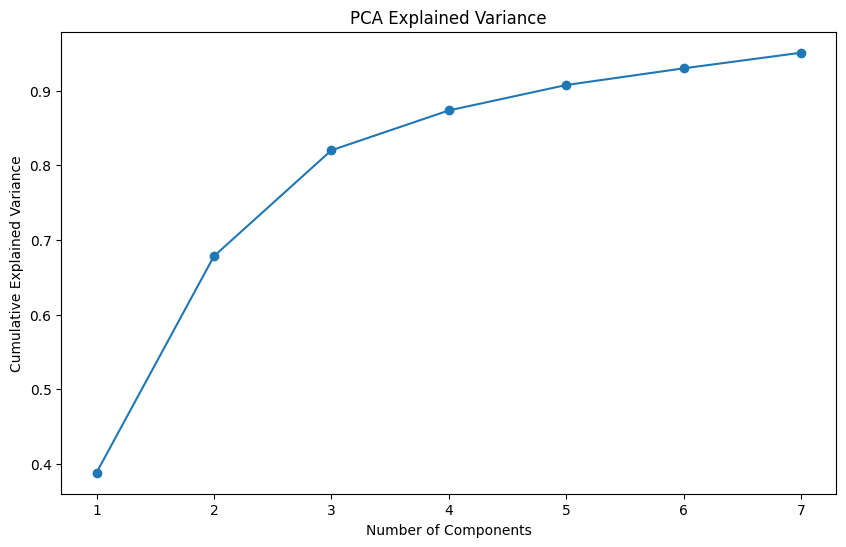

Explained variance ratio by component: [0.38808331 0.29007784 0.14187771 0.0534053  0.0340714  0.02235909
 0.02092073]
Cumulative explained variance: [0.38808331 0.67816115 0.82003886 0.87344416 0.90751556 0.92987465
 0.95079538]


In [17]:
# Plot the explained variance ratio

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

# Print the explained variance ratio for each component
print(f"Explained variance ratio by component: {pca.explained_variance_ratio_}")

# Print the cumulative explained variance
print(f"Cumulative explained variance: {pca.explained_variance_ratio_.cumsum()}")

2 Componenets explain 67% of the total variation 
3 Components explain 82% and 3 Components 87%

Lets review how the features create variation within the top 3 Components

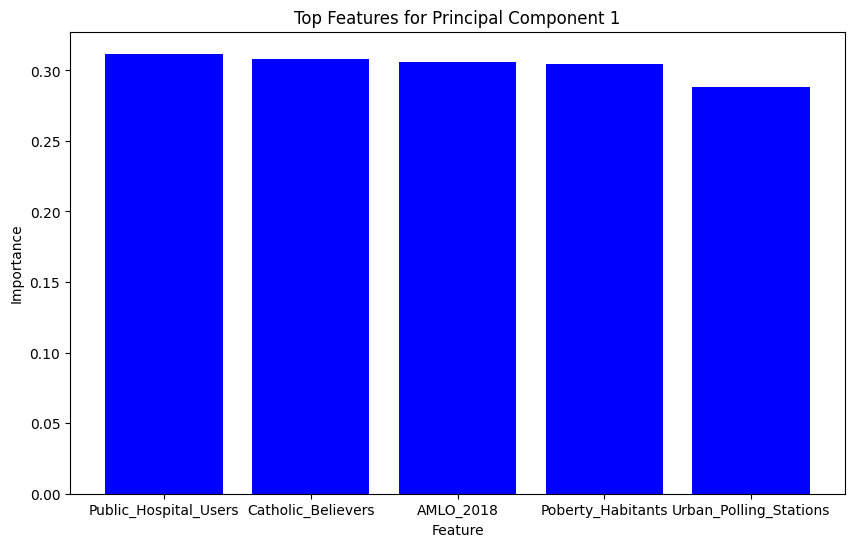

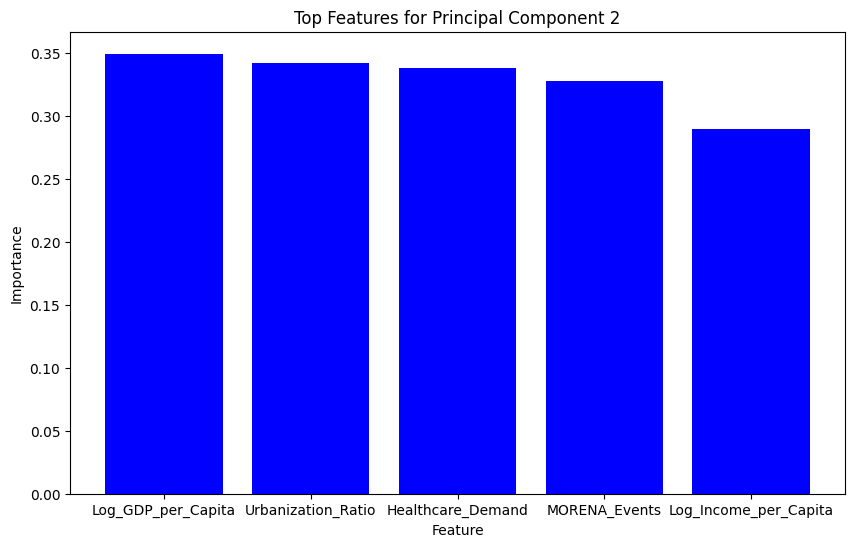

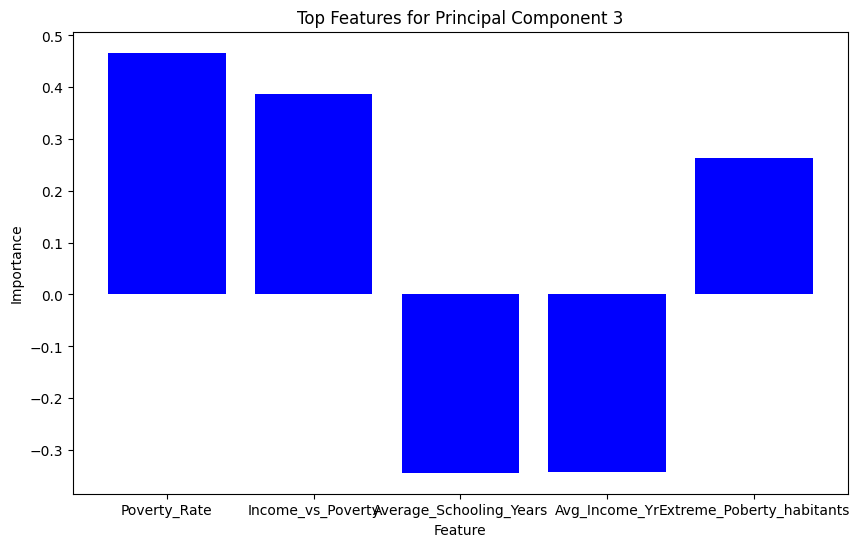

In [18]:
# Number of top features to display
n_top_features = 5

# Number of principal components to plot
n_components_to_plot = 3

# Plot top features for each of the principal components
for i in range(n_components_to_plot):
    top_features = np.abs(pca_df.iloc[i]).argsort()[-n_top_features:][::-1]
    top_features_names = X.columns[top_features]
    top_features_values = pca_df.iloc[i, top_features]

    plt.figure(figsize=(10, 6))
    plt.bar(top_features_names, top_features_values, color='b')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f'Top Features for Principal Component {i+1}')
    plt.show()

/var/folders/tt/4rw4wd117d5_9ss8qs8210jw0000gn/T/ipykernel_18092/3005898943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_2_df['COMPETITOR_Votes_2024'] = df_encoded['COMPETITOR_Votes_2024']  # Add the 'COMPETITOR_Votes_2024' column for hue
/var/folders/tt/4rw4wd117d5_9ss8qs8210jw0000gn/T/ipykernel_18092/3005898943.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlabel(X.columns[top_2_features[0]])
/var/folders/tt/4rw4wd117d5_9ss8qs8210jw0000gn/T/ipykernel_18092/3005898943.py:14: FutureWarning: Series.__getitem__ treating keys as positions is d

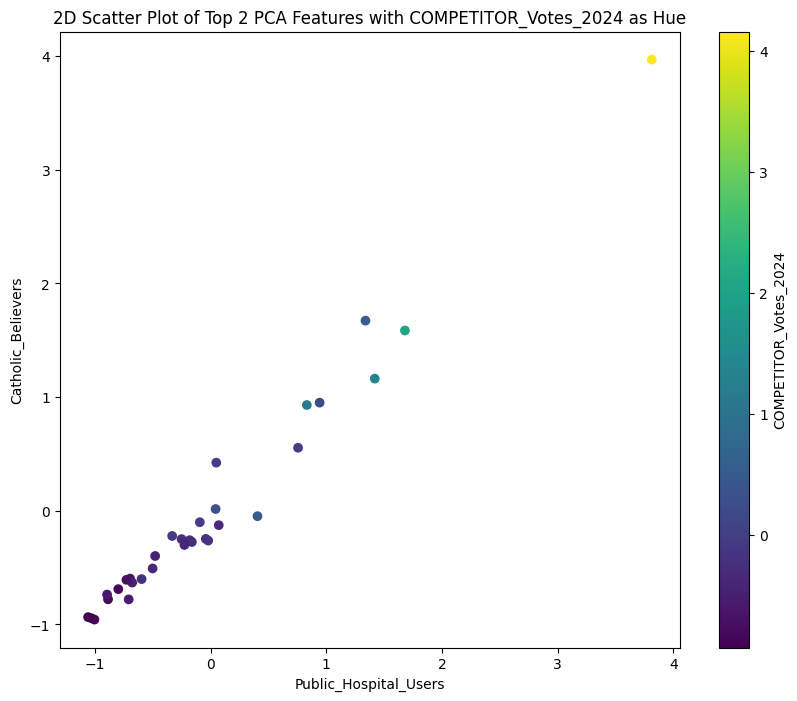

In [19]:
import seaborn as sns

# Get the top 2 features from the first principal component
top_2_features = np.abs(pca_df.iloc[0]).argsort()[-2:][::-1]

# Create a DataFrame with the top 2 features
top_2_df = X.iloc[:, top_2_features]
top_2_df['COMPETITOR_Votes_2024'] = df_encoded['COMPETITOR_Votes_2024']  # Add the 'COMPETITOR_Votes_2024' column for hue

# Plot 2D scatter plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(top_2_df.iloc[:, 0], top_2_df.iloc[:, 1], c=top_2_df['COMPETITOR_Votes_2024'], cmap='viridis')
plt.xlabel(X.columns[top_2_features[0]])
plt.ylabel(X.columns[top_2_features[1]])
plt.colorbar(sc, label='COMPETITOR_Votes_2024')
plt.title('2D Scatter Plot of Top 2 PCA Features with COMPETITOR_Votes_2024 as Hue')
plt.show()

Lets visualize the clusters

In [20]:
# Initialize PCA to reduce to 2 components for 2D visualization
pca_2d = PCA(n_components=2)

# Fit and transform the data
X_pca_2d = pca_2d.fit_transform(X)

# Create a DataFrame with the 2 principal components
pca_df_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df_2d['AMLO_2018'] = df_encoded['AMLO_2018']  # Add the 'AMLO_2018' column for hue

# Initialize PCA to reduce to 3 components for 3D visualization
pca_3d = PCA(n_components=3)

# Fit and transform the data
X_pca_3d = pca_3d.fit_transform(X)

# Create a DataFrame with the 3 principal components
pca_df_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['AMLO_2018'] = df_encoded['AMLO_2018']  # Add the 'AMLO_2018' column for hue

Apply K-Means

In [21]:
# Perform PCA to reduce to 2 components for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Apply K-means clustering
n_clusters = 2  # I pick 2 clusters because if I take 3 or 4 it clusters the further away points (that look like outliers)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pca_df_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df_2d['Cluster'] = kmeans.fit_predict(X_pca_2d)

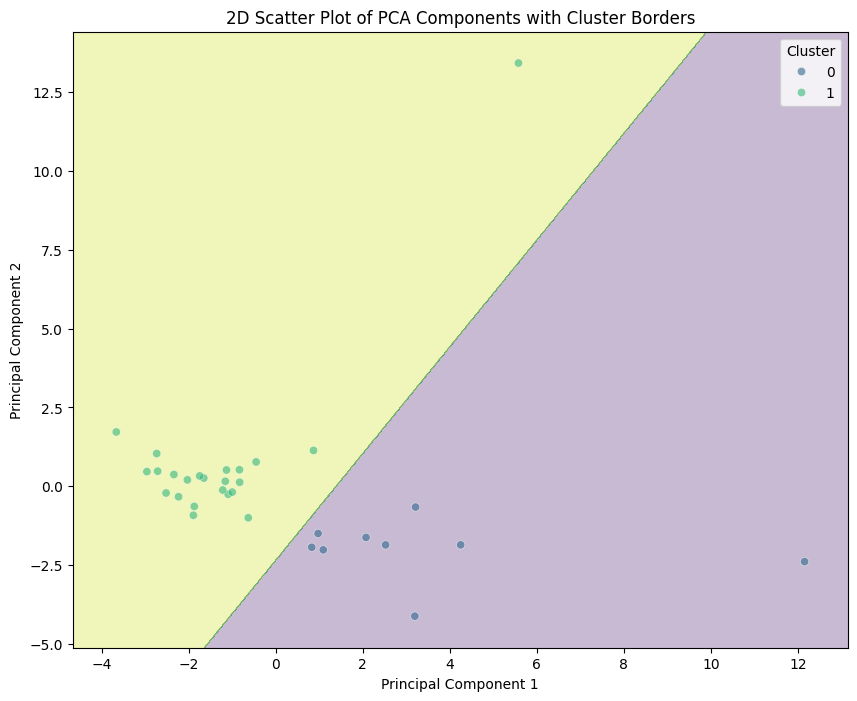

In [22]:
# Create a mesh grid
x_min, x_max = pca_df_2d['PC1'].min() - 1, pca_df_2d['PC1'].max() + 1
y_min, y_max = pca_df_2d['PC2'].min() - 1, pca_df_2d['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the cluster for each point in the mesh grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and the scatter plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df_2d, legend='full', alpha=0.6)
plt.title('2D Scatter Plot of PCA Components with Cluster Borders')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

I can see clearly that there are 2 main clusters for principal components.
PC 2 and 3 look like outliers!
So now lets try to visualize the votes mean distribution per cluster to identy if there is in fact a trend.

In [23]:
# Calculate the Mean of COMPETITOR_Votes_2024 by cluster
competitor_votes_means = df_clustered.groupby('Cluster')['COMPETITOR_Votes_2024'].mean()

NameError: name 'df_clustered' is not defined

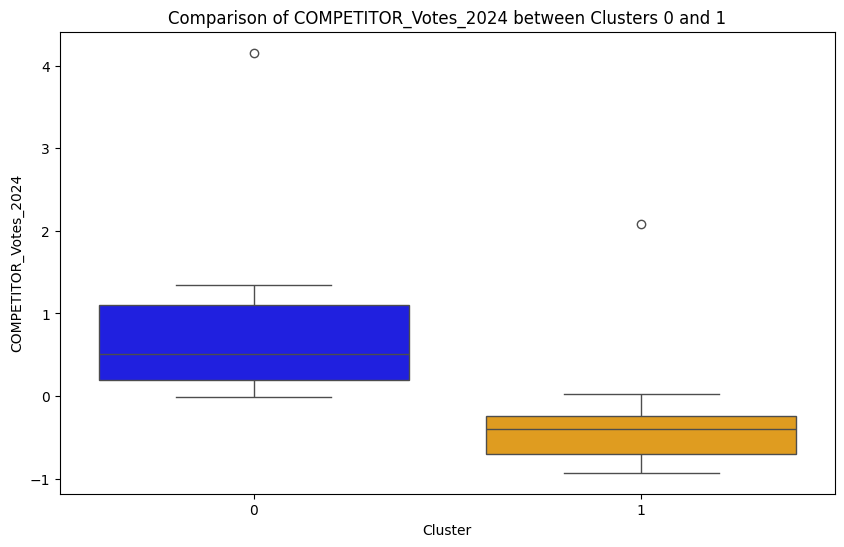

In [ ]:
# Create the boxplots of the 2 clusters in X axis and COMPETITOR_Votes_2024 in Y axis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='COMPETITOR_Votes_2024', data=df_clustered, hue='Cluster', palette=['blue', 'orange'], dodge=False)
plt.xlabel('Cluster')
plt.ylabel('COMPETITOR_Votes_2024')
plt.title('Comparison of COMPETITOR_Votes_2024 between Clusters 0 and 1')
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

We see clearly that Vluster 1 (Orange color) voted less for MORENA Competitor President!!!!!!!!!!!

Now lets analyze the behavior (average values) of the main features of both clusters:

In [ ]:
# Number of top features to display
n_top_features = 5

# Get the indices of the top features for the first and second principal components
top_features_pc1 = np.abs(pca_df.iloc[0]).argsort()[-n_top_features:][::-1]
top_features_pc2 = np.abs(pca_df.iloc[1]).argsort()[-n_top_features:][::-1]

# Print the top features for the first principal component
print("Top features for PC1:")
for feature in top_features_pc1:
    print(f" - {X.columns[feature]} (importance: {pca_df.iloc[0, feature]})")

# Print the top features for the second principal component
print("Top features for PC2:")
for feature in top_features_pc2:
    print(f" - {X.columns[feature]} (importance: {pca_df.iloc[1, feature]})")

Top features for PC1:
 - Public_Hospital_Users (importance: 0.31192992888317944)
 - Catholic_Believers (importance: 0.30817290448500917)
 - AMLO_2018 (importance: 0.30561759873060096)
 - Poberty_Habitants (importance: 0.30442226086420376)
 - Urban_Polling_Stations (importance: 0.2883869345745799)
Top features for PC2:
 - Log_GDP_per_Capita (importance: 0.34927635014053227)
 - Urbanization_Ratio (importance: 0.3416186692225294)
 - Healthcare_Demand (importance: 0.33774879309528844)
 - Sheinbaum_MORENA_Events (importance: 0.3277147706157956)
 - Log_Income_per_Capita (importance: 0.28918939278243333)


I will then plot the identified variation of the Means of the features of both clusters

In [ ]:
# Define the main characteristics for PC1 y PC2
top_features_pc1 = ['Public_Hospital_Users', 'Catholic_Believers', 'AMLO_2018', 'Poberty_Habitants', 'Urban_Polling_Stations']
top_features_pc2 = ['Log_GDP_per_Capita', 'Urbanization_Ratio', 'Healthcare_Demand', 'Sheinbaum_MORENA_Events', 'Log_Income_per_Capita']
top_features = list(set(top_features_pc1 + top_features_pc2))

# Calculate the mean characteristic per cluster
cluster_means_top = df_clustered.groupby('Cluster')[top_features].mean().T

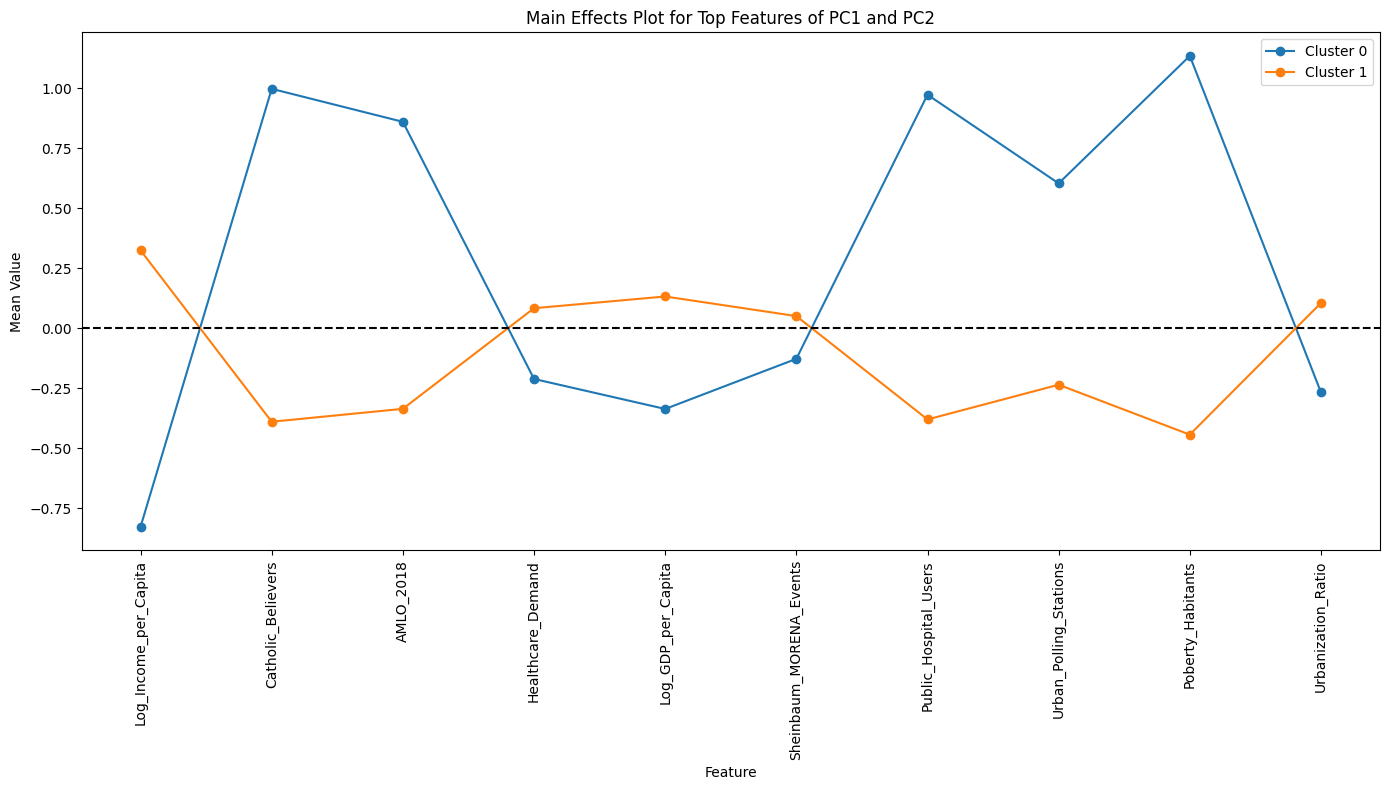

In [ ]:
# Number of clusters
n_clusters = cluster_means_top.shape[1]

# Number of main features
n_features = cluster_means_top.shape[0]

# Crear el gráfico de efectos principales
plt.figure(figsize=(14, 8))

# Plot the mean values for each top feature
for cluster in range(n_clusters):
    plt.plot(cluster_means_top.index, cluster_means_top.iloc[:, cluster], marker='o', label=f'Cluster {cluster}')

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.title('Main Effects Plot for Top Features of PC1 and PC2')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### Orange Cluster #1 (with Lower Votes for the President of MORENA) have this characteristics in general:  
* Higher Income per Capita
* Less catholic
* Voted less for AMLO in 2018
* Use Less Public Hospital (Hence higher Private Hospitals)
* Live in cities Less Poor Habitants 
* And more Urban Region 


## PRE MODELING

Finally before moving to the next stage of Modeling, lets do some quick checks to understand if we can get a potential model that can be optimized in the next phase of the project. I will use Random Forest and Regression Techniques for a quick sanity Check.

### First I will split the data in X and Y. Also in Training and Testing.

In [ ]:
# Define your target variable (y) and feature variables (X)
X = df_encoded.drop('COMPETITOR_Votes_2024', axis=1)  # Replace with your actual target column
y = df_encoded['COMPETITOR_Votes_2024']  # Replace with your actual target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now I will train a random forest model

In [ ]:
# Initialize and train the Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
rf_predictions = rf.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print the evaluation metrics
print(f"Random Forest MSE: {rf_mse}, R2: {rf_r2}")

Random Forest MSE: 0.07626120433179329, R2: 0.8502082193246713


the Accuracy is not bad, now lets see how does Linear regression look

In [ ]:
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
lr_predictions = lr.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression MSE: {lr_mse}, R2: {lr_r2}")

Linear Regression MSE: 0.048416820393387516, R2: 0.9048999841412215


Linear Regression values have a 90.48 Training accuracy!

# Conclusions!

### Final Conclusion

In our feature engineering process for the Data Science capstone project, we focused on transforming and optimizing our dataset to enhance model performance and insights. Here are the key steps and findings:

#### Principal Component Analysis (PCA)
- We conducted PCA to identify the most influential features in our dataset. The top features for the first principal component (PC1) included Public_Hospital_Users, Catholic_Believers, AMLO_2018, Poberty_Habitants, and Urban_Polling_Stations.
- For the second principal component (PC2), the top features were Log_GDP_per_Capita, Urbanization_Ratio, Healthcare_Demand, Sheinbaum_MORENA_Events, and Log_Income_per_Capita.
- PCA helped us reduce dimensionality while retaining the most significant variance in the data.

#### Clustering Analysis
- We applied K-means clustering on the PCA-transformed data to identify potential clusters within our dataset.
- The clusters were visualized using scatter plots, revealing distinct groups that may indicate underlying patterns in the data.

#### Feature Scaling and Transformation
- We performed scaling and log transformations on continuous variables to normalize their distributions and improve model performance.
- This included calculating proportions such as GDP per capita and applying log transformations to these features.

#### Visualization
- Various plots, including histograms, bar charts, and scatter plots, were used to visualize the distributions and relationships between features.
- These visualizations provided insights into the data structure and highlighted important trends and patterns.

### Objective Achievements
- Successfully identified and transformed key features in the dataset.
- Applied PCA and clustering to understand the data's underlying structure.
- Visualized the important features and their relationships, aiding in better interpretation and decision-making.

This thorough feature engineering process has prepared our dataset for the next steps in the data science workflow, including model training and evaluation, ultimately aiming to improve the predictive accuracy and insights of our final models.


In [ ]:
#Export df_encoded to a csv file
df_encoded.to_csv('df_encoded.csv', index=False)
